In [1]:
# Reed Whitcraft
# Full-Time
# Project 1

### King County House Sales Exploration
___


> You can't answer a question that hasn't been asked. - Me

Before we explore the King County House Sales data we have been provided, we have to make that data purposeful, and data cannot answer a question that hasn't been asked. So, the first step is to ask ourselves what problem are we trying to solve.  Establishing this question gives us direction, and directionless data wrangling and exploration is a waste of time (and probably money).

So what are we concerned with? What question do we have and what are we trying to figure out?

Assuming the role of a home owner looking to sell his/her house, how can I appropriately price my house, so that I may get the highest offer, without letting it sit on the market for too long?  Is there anything I can do to increase the value of my house through renovating? Can I price my house at the same price of a similar house in another neighborhood, or should I keep my comparables restricted to my neighborhood, or similar neighborhoods?  


### Part I: Obtain & Scrub
***

#### Obtaining Our Data

With our question established, typically, we would have to find our data, whether it be through publicly available services, web scraping, purchase, or another means. Luckily, in this situation, we are dealing with data that was magically delivered to us.

#### Scrubbing Our Data

Given the questionable delivery (and creation?) of our data, we cannot consider exploring our question without first assessing the quality of our data and cleaning subsets that may be incorrectly typecasted, erroneous, empty, or impossible.  So, let's load and preview what we have.

In [49]:
# load initial libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [160]:
# load the data
data = pd.read_csv("kc_house_data.csv")

In [161]:
# preview the data
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


- One of the first things to notice is that there are a couple sqft_ features, and all are integer types (which is what we would expect), except sqft_basement which is a string. And if we look are the rows returned in data.head(), we can see that sqft_basement is, indeed, supposed to be an integer.

In [163]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [164]:
data.isna().sum() # checking for empty rows

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

- Looks like we have a pretty complete set of data, most columns are not empty/null.
- Looking at the three columns with missing information (waterfront, view, and yr_renovated), my immediate thought is that these may have been intended to be boolean representations of these features, so zeros in yr_renovated would mean that a house was not renovated, and 0 in waterfront would mean that those houses do not have waterfront views. If true, they are categorical in nature, and will want to convert this later if used.
- And after glancing at the stats provided in data.describe(), we can see that this is true for waterfront.

##### Back to sqft_basement - let's see what's actually there

In [165]:
data.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
530.0       103
480.0       103
450.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
780.0        76
550.0        76
650.0        75
240.0        74
680.0        73
380.0        73
850.0        72
          ...  
3260.0        1
374.0         1
3500.0        1
266.0         1
1770.0        1
2730.0        1
417.0         1
2720.0        1
1798.0        1
516.0         1
861.0         1
2490.0        1
3480.0        1
2196.0        1
2350.0        1
2610.0        1
768.0         1
1245.0        1
506.0         1
1008.0        1
906.0         1
2600.0        1
176.0         1
295.0         1
2190.0        1
2250.0        1
588.0         1
784.0         1
1816.0        1
1284.0        1
Name: sqft_basement, Len

- As expected, numbers stored as strings; however, there are some "?" placeholders instead of 0
- This '?' might mean that there was no record of the square footage of the basements for these houses but that these houses had basements (thus, purposefully distinguished from 0), or it may mean that this information was not available.
- Given this, we could either replace these values with an average of our data set, or 0. Given that it's only a small subset of our data (454), it's safe to clean this up. 


In [166]:
questionable_basements = data.loc[data['sqft_basement'] == '?']
num_questionable_basements = len(questionable_basements)
print("number of questionable basements:", num_questionable_basements)

number of questionable basements: 454


In [167]:
data.loc[data['sqft_basement'] == '?', 'sqft_basement'] = 0
data.sqft_basement.describe()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

In [168]:
data.sqft_basement = data.sqft_basement.astype(np.float64) # change typing

In [169]:
data.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

- Again, looks like the most common value is 0, which should represent that a house was not renovated. Going to change the missing values to this.

In [170]:
data.yr_renovated.fillna(0, inplace=True)

In [171]:
data.waterfront.fillna(0, inplace=True) # fill null values in waterfront as well

In [172]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233863,3.409825,7.657915,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.765686,0.650546,1.173200,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Part II: Exploration & Visualization
***

Now that we've done some cleaning (and there very well may be more cleaning necessary in the future), let's see what our data looks like to see what patterns we may find.

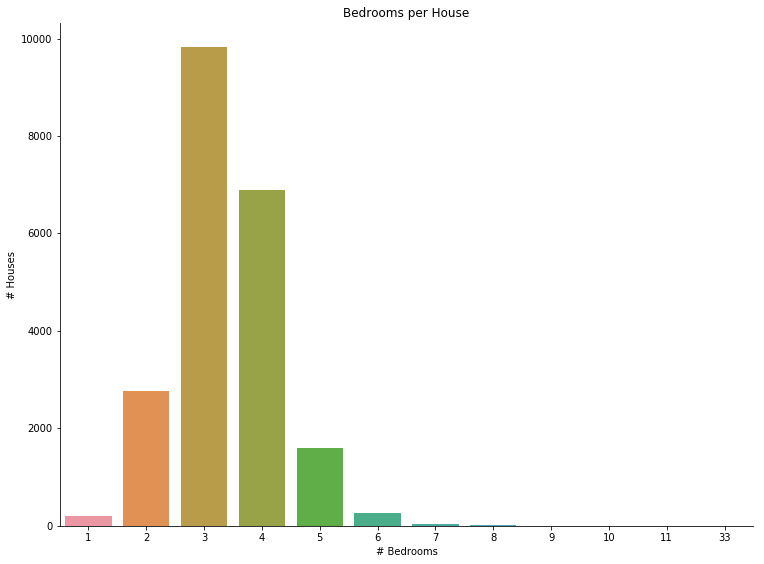

In [173]:
sns.catplot(data=data, x='bedrooms', y=None, kind='count')
plt.title("Bedrooms per House")
plt.xlabel("# Bedrooms")
plt.ylabel("# Houses")
plt.gcf().set_size_inches(11.7, 8.27)

Looks fairly normally distributed, with the most common number of bedrooms per house being 3-4. Looks like we have a pretyy big outlier(s) with 33 bedrooms.

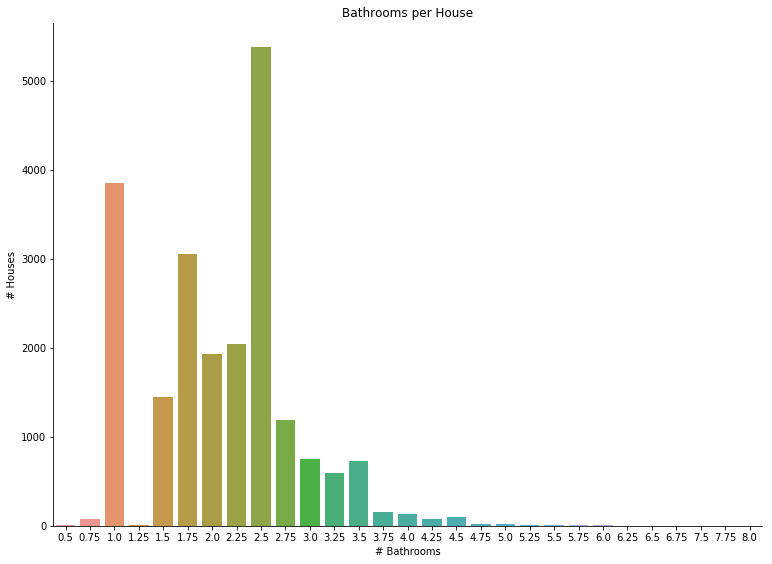

In [174]:
sns.catplot(data=data, x='bathrooms', y=None, kind='count')
plt.title("Bathrooms per House")
plt.xlabel("# Bathrooms")
plt.ylabel("# Houses")
plt.gcf().set_size_inches(11.7, 8.27)

A majority of the bathrooms are between 1.5 and 2.5, with tails on either end. There's a big spike for 1 bathrooms, and this is probably because of apartments and 1-2 bedroom smaller houses might only have 1 bathroom.  

Text(-2.450000000000003, 0.5, '# Houses')

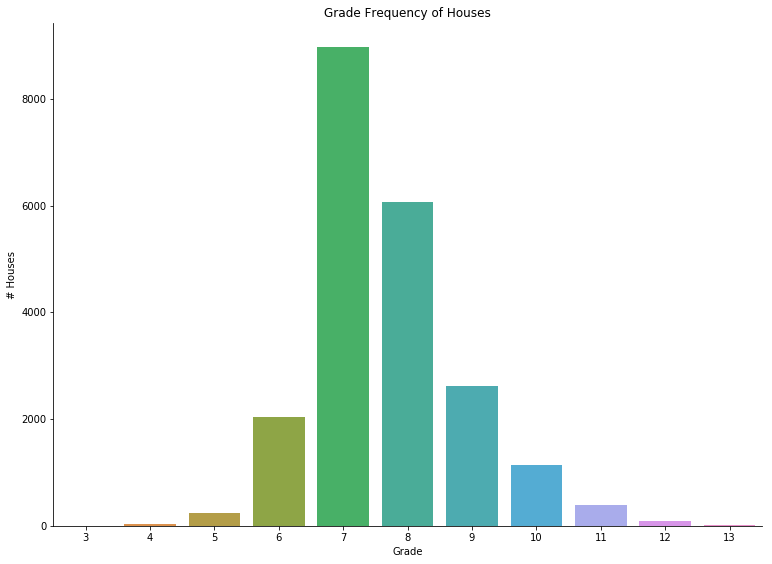

In [175]:
sns.catplot(data=data, x='grade', y=None, kind='count')
plt.gcf().set_size_inches(11.7, 8.27)
plt.title("Grade Frequency of Houses")
plt.xlabel("Grade")
plt.ylabel("# Houses")

Relatively normal distribution of housing grades, with the most coommon values around 7-8.  Fairly expectable.

Text(-8.825000000000003, 0.5, '# Houses')

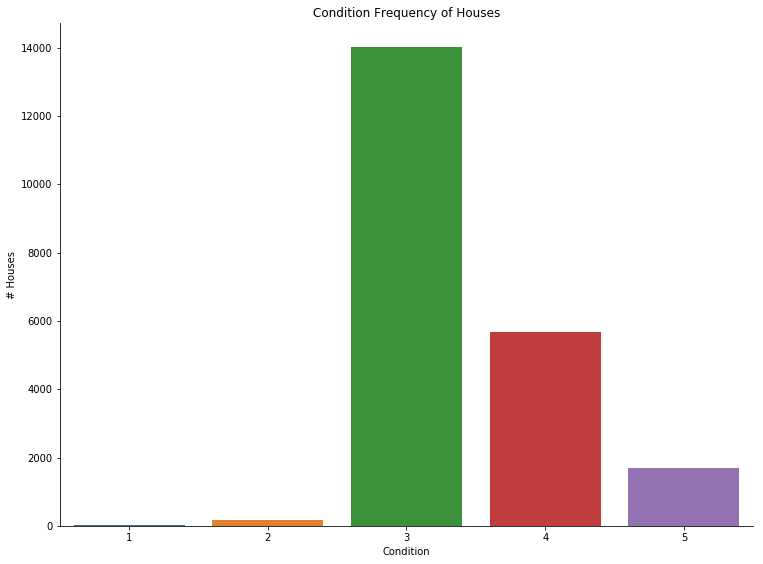

In [176]:
sns.catplot(data=data, x='condition', y=None, kind='count')
plt.gcf().set_size_inches(11.7, 8.27)
plt.title("Condition Frequency of Houses")
plt.xlabel("Condition")
plt.ylabel("# Houses")


Majority of houses have the 'average' condition (3), with more houses getting better condition ratings (4,5) than houses scoring below (1,2).  

#### Histograms of our columns to see distribution and see if anything pops out

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24a57f28>,
      dtype=object)

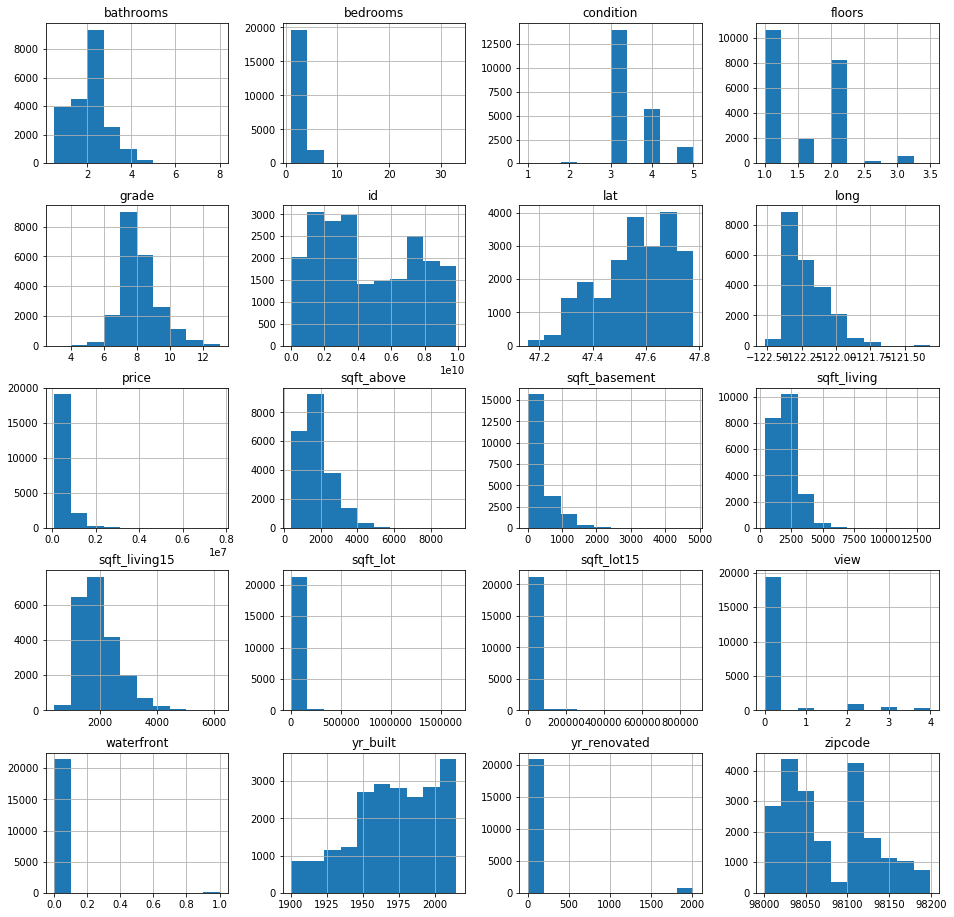

In [177]:
data.hist(figsize=(16,16))

- Grade looks normally distributed
- condition, floors, and waterfront look again to be categorical in nature
- lot of the other features do not show a strong normal distribution, so normalizing some of these may be necessary when we consider their impact.
- we see longer tails for sqft columns

Plotting Density Plot to see distribution of some of these continuous features

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


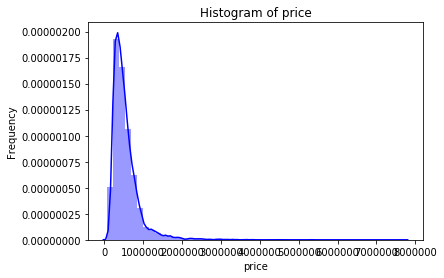

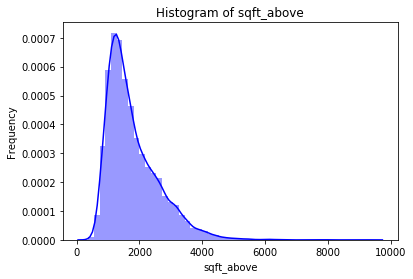

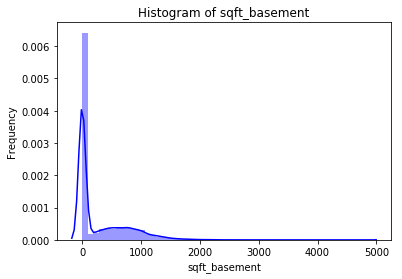

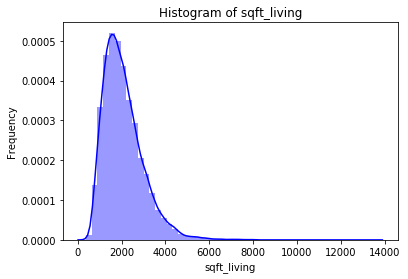

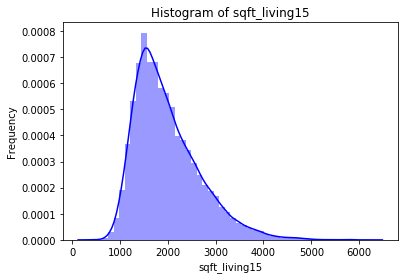

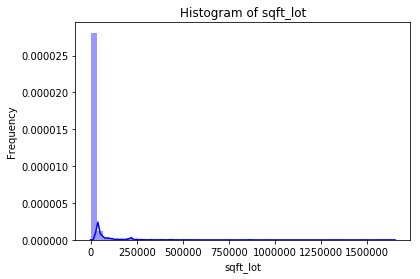

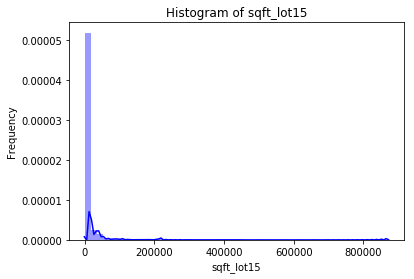

In [178]:
columns = ['price', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15']
for i, col in enumerate(columns):
    plt.figure(i)
    sns.distplot(data[col], hist=True, kde=True, color='blue')
    plt.title('Histogram of ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

Okay, so it looks like a lot of these square foot features are positively skewed, so we will want to normalize them before considering their candidacy in our future model.

Additionally, going to drop sqft_basement from consideration as there are a significant amount of zeros, and we are already working with a couple square feet metrics

In [179]:
data = data.drop(['sqft_basement'], axis=1)

Let's normalize these columns now then scale them

In [180]:
def log_transform(cat):
    log_cat = (cat - np.mean(cat)) / np.sqrt(np.var(cat))
    return log_cat

In [181]:
log_sq_above = np.log(data['sqft_above'])
log_sq_living = np.log(data['sqft_living'])
log_sq_living15 = np.log(data['sqft_living15'])
log_sq_lot = np.log(data['sqft_lot'])
log_sq_lot15 = np.log(data['sqft_lot15'])

data['sqft_above'] = log_transform(log_sq_above)
data['sqft_living'] = log_transform(log_sq_living)
data['sqft_living15'] = log_transform(log_sq_living15)
data['sqft_lot'] = log_transform(log_sq_lot)
data['sqft_lot15'] = log_transform(log_sq_lot15)


Let's look at the density plots for these again.

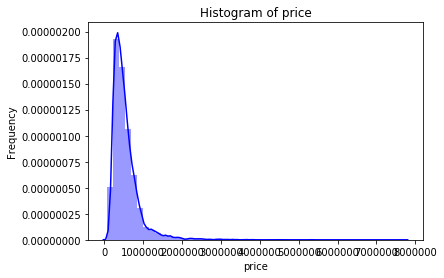

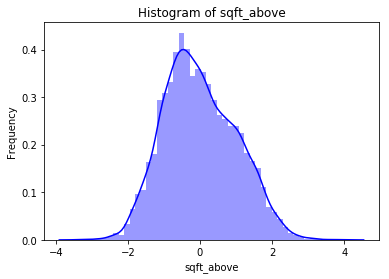

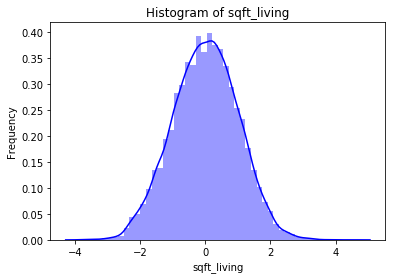

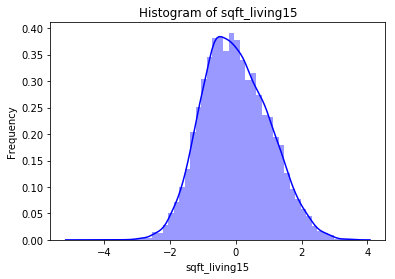

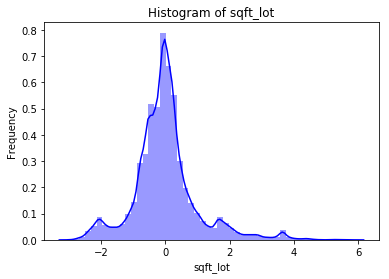

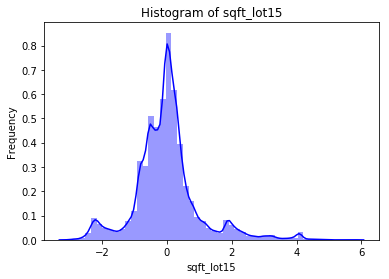

In [182]:
columns = ['price', 'sqft_above', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15']
for i, col in enumerate(columns):
    plt.figure(i)
    sns.distplot(data[col], hist=True, kde=True, color='blue')
    plt.title('Histogram of ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

These now look more normally distributed, though we see mini-modals for sqft_lot15 and sqft_lot, so we should keep this in mind.

#### Looking at latitude and longitude of house sales

<Figure size 864x864 with 0 Axes>

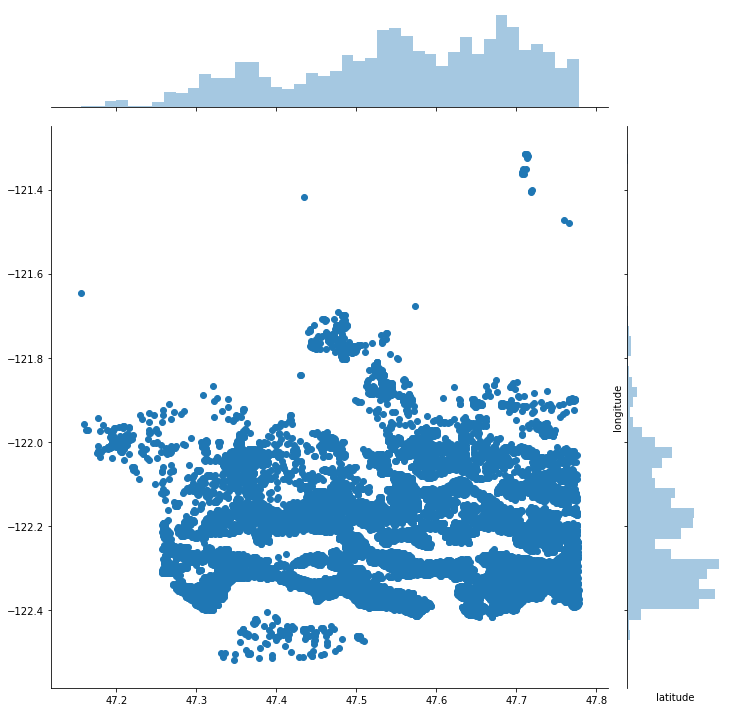

In [183]:
plt.figure(figsize=(12,12))
sns.jointplot(x=data.lat.values, y=data.long.values, height=10)
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.show()

From the histograms on the top and right side, we can see that some areas (mostly the bottom right) sell more frequently than other areas. Maybe this is a more densely populated area, or an area that was just developed, or something else we just don't know yet.

Plotting scatterplots with y, the dependent variable, price. And for the independent variables, we'll take a look at square feet, # of bathrooms, floors, and some other ones we think might have some relationship with a house's price

Text(0, 0.5, 'Price')

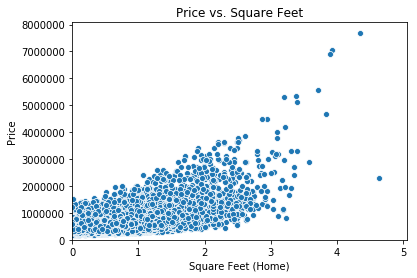

In [184]:
ax = sns.scatterplot(x="sqft_living", y="price", data=data)
plt.xlim(0,None)
plt.ylim(0,None)
plt.title("Price vs. Square Feet")
plt.xlabel("Square Feet (Home)")
plt.ylabel("Price")

Text(0.5, 1.0, 'Price vs. Floors')

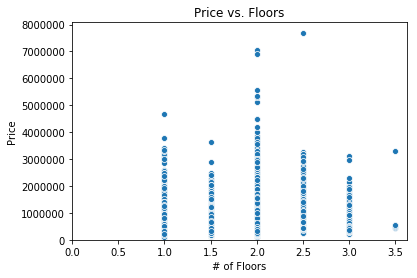

In [185]:
sns.scatterplot(x='floors', y='price', data=data)
plt.xlim(0,None)
plt.ylim(0,None)
plt.xlabel("# of Floors")
plt.ylabel("Price")
plt.title("Price vs. Floors")

Text(0.5, 1.0, 'Price vs. Grade')

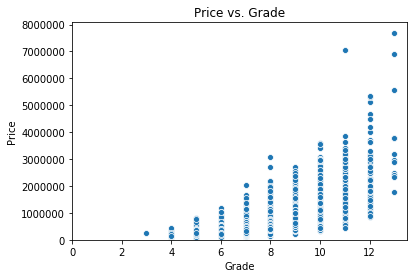

In [186]:
sns.scatterplot(x='grade', y='price', data=data)
plt.xlim(0,None)
plt.ylim(0,None)
plt.xlabel("Grade")
plt.ylabel("Price")
plt.title("Price vs. Grade")


Text(0.5, 1.0, 'Price vs. Condition')

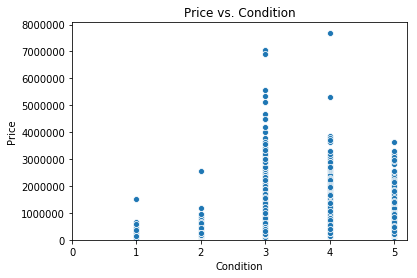

In [187]:
sns.scatterplot(x='condition', y='price', data=data)
plt.xlim(0,None)
plt.ylim(0,None)
plt.xlabel("Condition")
plt.ylabel("Price")
plt.title("Price vs. Condition")


We can clearly see that there is a positive relationship between square feet and price.
We can also see a positive relationship between condition, grade, floors and price.  We also reconfirm that (grade, condition) are not continuous variables and we may need to change them to be categorical when considering their inclusion into our model.

Text(0.5, 1.0, 'Price vs. Zipcode')

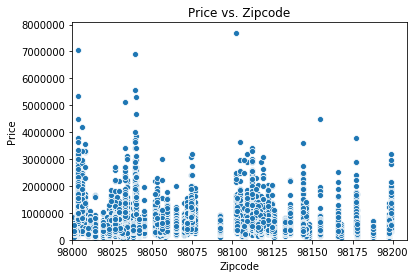

In [188]:
sns.scatterplot(x='zipcode', y='price', data=data)
plt.xlim(98000,None)
plt.ylim(0,None)
plt.xlabel("Zipcode")
plt.ylabel("Price")
plt.title("Price vs. Zipcode")

We can see that some zipcodes have higher selling prices than others.  This makes sense as location, and neighborhood amenities/features is often considered to be associated with a house's value and desirability.

In [189]:
corr_matrix = data.corr()
corr_matrix['price'].sort_values(ascending=False)

price            1.000000
grade            0.667951
sqft_living      0.611839
sqft_living15    0.543829
sqft_above       0.542675
bathrooms        0.525906
view             0.395734
bedrooms         0.308787
lat              0.306692
waterfront       0.264306
floors           0.256804
sqft_lot         0.161561
sqft_lot15       0.147913
yr_renovated     0.117855
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

As expected, sqft and grade have a high correlation with price (you get more area for more money, and you pay more money for a better quality (grade) house.

### Categorize houses into a location/neighborhood-dependent tier

- Generally, one can assume that similar houses in a single neighborhood have similar selling prices.  But when compared to similar houses in *different* neighborhoods (like one's that have a higher crime rate, wealthier neighborhoods), they don't really compare.  
- Additionally, when buying or selling a house, members of both parties are often interested in price/sqft - as different neighborhoods can have different ranges (like we see in New York City) - and you can compare prices of houses in the same neighborhood.
- And, right now, we have all these houses being considered the same way, so instead of trying to map out zipcodes, I am going to:

1. Add a column of Price/SqFt to our data.
2. Group houses by zipcode, and find the mean price per square feet for our zipcodes
2. Split zipcodes into three types of "neighborhoods" or "groups" 
  - Zipcodes that have sold below the average price (cheaper areas)
  - Zipcodes that sell above the average price, but not often (don't want to have their values overrepresented)
  - Zipcodes that sell above the average price, and more frequently.  
3. Categorize these groupings as "cheap", "expensive low volume", and "expensive high volume" 
4. With this, I can drop zipcodes from our dataset, and ignore longitude and latitude, as that should also be encapsulated in the zipcode pricing groupings

In [190]:
data['price_per_sqft'] = data['price']/data['sqft_living']

Text(0, 0.5, 'Frequency')

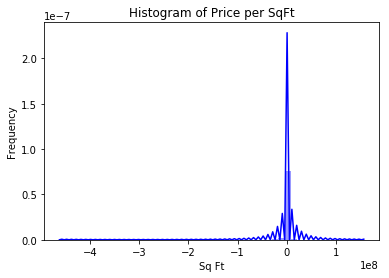

In [191]:
plt.figure()
sns.distplot(data['price_per_sqft'], hist=True, kde=True, color='blue')
plt.title('Histogram of Price per SqFt')
plt.xlabel('Sq Ft')
plt.ylabel('Frequency')

In [192]:
frequency = data.groupby('zipcode').count()['id']
mean = data.groupby('zipcode').mean()['price_per_sqft']
cluster = pd.concat([frequency, mean], axis=1)

In [193]:
cluster['zipcode'] = cluster.index

In [194]:
cluster.columns = ['frequency', 'price_per_sqft', 'zipcode']
cluster.describe()

,frequency,price_per_sqft,zipcode
count,70.000000,7.000000e+01,70.000000
mean,308.528571,-5.636509e+05,98077.300000
std,142.223820,8.607885e+05,56.622408
min,50.000000,-3.389661e+06,98001.000000
25%,204.250000,-1.050377e+06,98029.250000
50%,282.500000,-4.965370e+05,98067.500000
75%,408.250000,6.630136e+04,98117.750000
max,602.000000,1.351625e+06,98199.000000


Looks like the mean is ~$250/SqFt so we will divide the zipcodes here, then split the higher priced groups by the mean frequency (282), and categorize ones below that as lower volume, and ones above as higher volume.

In [195]:
# zipcodes where mean price per square foot is less than overall mean price per square foot
cluster_cheap = cluster[cluster.price_per_sqft < 251]
cluster_cheap.index

Int64Index([98001, 98002, 98003, 98004, 98005, 98007, 98008, 98022, 98023,
            98027, 98031, 98032, 98033, 98034, 98038, 98040, 98042, 98045,
            98053, 98055, 98056, 98058, 98074, 98092, 98103, 98105, 98106,
            98107, 98108, 98109, 98115, 98116, 98117, 98118, 98119, 98122,
            98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166,
            98168, 98178, 98188, 98198, 98199],
           dtype='int64', name='zipcode')

In [196]:
cluster_temp = cluster[cluster.price_per_sqft >= 251]
cluster_expensive_low_volume = cluster_temp[cluster_temp.frequency < 282]
cluster_expensive_low_volume.index # zipcodes that sell for greater than mean price per sqft, but sell less frequently than the mean # sold

Int64Index([98010, 98011, 98014, 98019, 98024, 98030, 98039, 98070, 98072,
            98077, 98102, 98112, 98177],
           dtype='int64', name='zipcode')

In [197]:
cluster_expensive_high_volume = cluster_temp[cluster_temp.frequency >= 282]
cluster_expensive_high_volume.index #zipcodes that sell greater than mean price per sqft, and more frequently

Int64Index([98006, 98028, 98029, 98052, 98059, 98065, 98075], dtype='int64', name='zipcode')

In [198]:
len(cluster_cheap.index) + len(cluster_expensive_low_volume.index) + len(cluster_expensive_high_volume.index)
# cluster counts = total zipcodes in dataset, so all are included
# now want to add a column (categorical) that groups these zipcodes into their respective tiers

70

In [199]:
def get_zipcode_category(zipcode):
    if zipcode in cluster_cheap.index:
        return 'cheap'
    elif zipcode in cluster_expensive_low_volume.index:
        return 'expensive_low_volume'
    else:
        return 'expensive_high_volume'    

In [200]:
data['zipcode_type'] = data.zipcode.apply(get_zipcode_category)

In [201]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,zipcode_type
0,7129300520,10/13/2014,221900.0,3,1.00,-1.125582,-0.388439,1.0,0.0,0.0,...,-0.753583,1955,0.0,98178,47.5112,-122.257,-1.035453,-0.395459,-1.971425e+05,cheap
1,6414100192,12/9/2014,538000.0,3,2.25,0.709463,-0.113243,2.0,0.0,0.0,...,0.672709,1951,1991.0,98125,47.7210,-122.319,-0.326789,-0.024288,7.583203e+05,cheap
2,5631500400,2/25/2015,180000.0,2,1.00,-2.131943,0.244481,1.0,0.0,0.0,...,-1.752995,1933,0.0,98028,47.7379,-122.233,1.126531,0.042037,-8.443004e+04,expensive_high_volume
3,2487200875,12/9/2014,604000.0,4,3.00,0.070676,-0.523926,1.0,0.0,0.0,...,-1.026858,1965,0.0,98136,47.5208,-122.393,-0.990210,-0.545863,8.546073e+06,cheap
4,1954400510,2/18/2015,510000.0,3,2.00,-0.292732,0.008140,1.0,0.0,0.0,...,0.073516,1987,0.0,98074,47.6168,-122.045,-0.134221,-0.046395,-1.742209e+06,cheap


Now, we have a 'zipcode_type' categorical column that represents if a house belongs in a cheaper or more expensive area, so we can drop zipcode.

In [202]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price_per_sqft', 'zipcode_type'],
      dtype='object')

In [203]:
data = data.drop(['zipcode'], axis=1)

Now, going to get dummies for this column.  And, while we're here, going to get dummies for the other categorical features:

In [207]:
grade_dummies = pd.get_dummies(data.grade, prefix='g', drop_first=True)
condition_dummies = pd.get_dummies(data.condition, prefix='c', drop_first=True)
waterfront_dummies = pd.get_dummies(data.waterfront, prefix='w', drop_first=True)
zipcode_dummies = pd.get_dummies(data.zipcode_type, prefix='z', drop_first=True)

data = pd.concat([data, grade_dummies], axis=1)
data = pd.concat([data, condition_dummies], axis=1)
data = pd.concat([data, waterfront_dummies], axis=1)
data = pd.concat([data, zipcode_dummies], axis=1)


In [208]:
bath_dummies = pd.get_dummies(data.bathrooms, prefix='bath')
bed_dummies = pd.get_dummies(data.bedrooms, prefix='bed')
floor_dummies = pd.get_dummies(data.floors, prefix='floor')

In [209]:
data = pd.concat([data, bath_dummies, bed_dummies, floor_dummies], axis=1)

In [210]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,bed_9,bed_10,bed_11,bed_33,floor_1.0,floor_1.5,floor_2.0,floor_2.5,floor_3.0,floor_3.5
0,7129300520,10/13/2014,221900.0,3,1.00,-1.125582,-0.388439,1.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,0.709463,-0.113243,2.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,-2.131943,0.244481,1.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,0.070676,-0.523926,1.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,-0.292732,0.008140,1.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Columns: 153 entries, id to floor_3.5
dtypes: float64(14), int64(5), object(2), uint8(132)
memory usage: 6.2+ MB


In [212]:
data = data.drop(['grade', 'condition', 'waterfront', 'view', 'zipcode_type'], axis=1)

In [213]:
data = data.drop(['bathrooms', 'floors', 'bedrooms'], axis=1)

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Columns: 145 entries, id to floor_3.5
dtypes: float64(10), int64(2), object(1), uint8(132)
memory usage: 4.9+ MB


In [215]:
data = data.drop(['lat', 'long'], axis=1)

In [216]:
data.columns

Index(['id', 'date', 'price', 'sqft_living', 'sqft_lot', 'sqft_above',
       'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15',
       ...
       'bed_9', 'bed_10', 'bed_11', 'bed_33', 'floor_1.0', 'floor_1.5',
       'floor_2.0', 'floor_2.5', 'floor_3.0', 'floor_3.5'],
      dtype='object', length=143)

### Part IV: Modeling

Now that we have normalized our continuous variables and scaled them, and have converted our categorical variables into something our model can process, I am going to a preliminary look at how well I'm doing thus far, and may return to do some more exploration.

In [217]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [218]:
reg = LinearRegression()

In [219]:
labels = data.price
train0 = data.drop(['id', 'date'], axis=1)

In [220]:
train0 = train0.drop(['price'], axis=1)

In [221]:
train0.head()

,sqft_living,sqft_lot,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15,price_per_sqft,g_3,g_4,...,bed_9,bed_10,bed_11,bed_33,floor_1.0,floor_1.5,floor_2.0,floor_2.5,floor_3.0,floor_3.5
0,-1.125582,-0.388439,-0.753583,1955,0.0,-1.035453,-0.395459,-1.971425e+05,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.709463,-0.113243,0.672709,1951,1991.0,-0.326789,-0.024288,7.583203e+05,0,0,...,0,0,0,0,0,0,1,0,0,0
2,-2.131943,0.244481,-1.752995,1933,0.0,1.126531,0.042037,-8.443004e+04,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.070676,-0.523926,-1.026858,1965,0.0,-0.990210,-0.545863,8.546073e+06,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-0.292732,0.008140,0.073516,1987,0.0,-0.134221,-0.046395,-1.742209e+06,0,0,...,0,0,0,0,1,0,0,0,0,0


In [222]:
train0.columns

Index(['sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15', 'price_per_sqft', 'g_3', 'g_4',
       ...
       'bed_9', 'bed_10', 'bed_11', 'bed_33', 'floor_1.0', 'floor_1.5',
       'floor_2.0', 'floor_2.5', 'floor_3.0', 'floor_3.5'],
      dtype='object', length=140)

In [223]:
len(train0.columns)

140

In [129]:
x_train, x_test, y_train, y_test = train_test_split(train0, labels, test_size=0.2, random_state=2)

In [130]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [131]:
reg.score(x_test, y_test)

0.7210387416906836

In [132]:
reg.coef_

array([ 8.07721155e+04,  6.89489878e+03,  2.31818704e+04, -1.51409317e+03,
        3.98678674e+01,  4.00833575e+04, -1.57360380e+04,  5.04223281e-05,
       -5.09899110e-08, -3.25431169e+05, -3.89419748e+05, -3.99499925e+05,
       -3.73637221e+05, -3.23160774e+05, -1.90978047e+05, -3.06573180e+04,
        2.36600046e+05,  6.41385813e+05,  1.15479834e+06, -6.22597153e+04,
       -2.47346915e+04, -5.42411813e+03,  2.26230156e+04,  6.97955093e+04,
       -4.04312452e+05,  4.04312452e+05, -1.55931343e+05,  3.39420950e+04,
        1.21989248e+05, -4.53302152e+05, -4.25696950e+05, -3.77047396e+05,
       -4.34819796e+05, -3.87585599e+05, -3.91050923e+05, -3.91165081e+05,
       -3.69969497e+05, -3.86874672e+05, -3.69201299e+05, -3.35405609e+05,
       -2.68394246e+05, -3.00748777e+05, -2.02481971e+05, -1.97961362e+05,
       -7.00619218e+04, -1.09215388e+05,  7.78208845e+04,  9.17433939e+03,
        2.33701088e+05,  4.04397982e+05,  6.53218300e+05,  7.73745693e+05,
        6.82950147e+05, -

In [133]:
reg.intercept_

4620723.537852758

In [134]:
y_pred = reg.predict(x_test)

In [135]:
from sklearn.metrics import mean_squared_error

In [136]:
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print("RMSE: ", lin_rmse)

RMSE:  198467.0445171454


As RMSE (root mean square error) is a measure of how far from the regression line data points are, this means that we are about $198k off of actual house values with the current model.

In [137]:
data['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

#### Stepwise Selection of features
Using this function (provided), we are going to see what the addition and subtraction of our features do to our model.

In [139]:
import statsmodels.api as sm

In [140]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [141]:
result=stepwise_selection(train0, data['price'], verbose=True)
print('resulting features:')
print(result)

Add  sqft_above                     with p-value 0.0
Add  g_11                           with p-value 0.0
Add  sqft_living                    with p-value 0.0
Drop sqft_above                     with p-value 0.0556535


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Add  w_0.0                          with p-value 0.0
Add  z_expensive_low_volume         with p-value 0.0
Add  w_1.0                          with p-value 0.0
Add  z_cheap                        with p-value 0.0
Add  g_13                           with p-value 0.0
Add  g_12                           with p-value 0.0
Add  g_10                           with p-value 0.0
Add  z_expensive_high_volume        with p-value 0.0
Add  g_9                            with p-value 3.7097e-205
Add  yr_built                       with p-value 6.33303e-159
Add  g_8                            with p-value 1.23352e-74
Add  bath_7.75                      with p-value 3.64413e-60
Add  bath_8.0                       with p-value 7.41924e-46
Add  sqft_living15                  with p-value 1.47776e-39
Add  c_5                            with p-value 1.83296e-32
Add  yr_renovated                   with p-value 1.02858e-32
Add  bath_6.0                       with p-value 6.21452e-33
Add  bath_4.75            

In [146]:
stepwise_features = ['g_11', 'sqft_living', 'w_0.0', 'z_expensive_low_volume', 'w_1.0', 'z_cheap', 'g_13', 'g_12', 'g_10', 'z_expensive_high_volume', 'g_9', 'yr_built', 'g_8', 'bath_7.75', 'bath_8.0', 'sqft_living15', 'c_5', 'yr_renovated', 'bath_6.0', 'bath_4.75', 'bath_4.25', 'bath_5.5', 'bath_3.75', 'bath_3.25', 'bath_4.5', 'bath_5.0', 'bath_5.25', 'bath_4.0', 'c_4', 'bath_3.5', 'bath_5.75', 'sqft_lot15', 'bath_6.25', 'floor_2.5', 'sqft_above', 'bath_6.75', 'bed_7', 'bed_4', 'bath_3.0', 'bed_6', 'g_6', 'floor_1.0', 'bed_2', 'bath_2.75', 'bath_2.25', 'bath_1.0']

In [147]:
len(stepwise_features) # before we needed 70+, try again with these


46

In [148]:
train1 = train0[stepwise_features]

In [149]:
train1.columns

Index(['g_11', 'sqft_living', 'w_0.0', 'z_expensive_low_volume', 'w_1.0',
       'z_cheap', 'g_13', 'g_12', 'g_10', 'z_expensive_high_volume', 'g_9',
       'yr_built', 'g_8', 'bath_7.75', 'bath_8.0', 'sqft_living15', 'c_5',
       'yr_renovated', 'bath_6.0', 'bath_4.75', 'bath_4.25', 'bath_5.5',
       'bath_3.75', 'bath_3.25', 'bath_4.5', 'bath_5.0', 'bath_5.25',
       'bath_4.0', 'c_4', 'bath_3.5', 'bath_5.75', 'sqft_lot15', 'bath_6.25',
       'floor_2.5', 'sqft_above', 'bath_6.75', 'bed_7', 'bed_4', 'bath_3.0',
       'bed_6', 'g_6', 'floor_1.0', 'bed_2', 'bath_2.75', 'bath_2.25',
       'bath_1.0'],
      dtype='object')

In [150]:
len(train1.columns)

46

In [153]:
reg2 = LinearRegression()
labels = data.price
x_train2, x_test2, y_train2, y_test2 = train_test_split(train1, labels, test_size=0.2, random_state=2)

reg2.fit(x_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [154]:
reg2.score(x_test2, y_test2)

0.7214518092142428

Our previous R squared was 0.7210387, so we are slightly better, with fewer features

In [155]:
reg2.intercept_

3803131.387564321

lower intercept too

In [157]:
y_pred2 = reg2.predict(x_test2)

In [158]:
lin_mse2 = mean_squared_error(y_pred2, y_test2)

In [159]:
lin_rmse2 = np.sqrt(lin_mse2)
print("RMSE: ", lin_rmse2)

RMSE:  198320.05159538335


Our previous root mean squared error was ~ $198,467 and now we are at $198,320 - so slightly better, but not incredible.
